# Load Modules

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate

# ML Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Load Data
## Load Relevant 2003 and 2004 LEAPS Datasets

In [2]:
df2003 = pd.read_pickle('.../LEAPS_03_clean2.pkl')
df2004 = pd.read_pickle('.../LEAPS_04_clean2.pkl')

## Create and Reshape Variables

In [3]:
# Create arrays for features and target variable
y2003 = df2003['grade_median_fitted'].copy().values
X2003 = df2003.copy().drop(['grade_median', 'grade_median_fitted'], axis=1)
X2003_no_derivatives = df2003.copy().drop(['grade_median', 'grade_median_fitted',
                                'math', 'english', 'urdu'], axis=1)
X2003_columns = X2003.copy().columns

y2004 = df2004['grade_median_fitted'].copy().values
X2004 = df2004.copy().drop('grade_median_fitted', axis=1)
X2004_no_derivatives = df2004.copy().drop(['grade_median', 'grade_median_fitted',
                                'math', 'english', 'urdu'], axis=1)
X2004_columns = X2004.copy().columns

# 2003

## Plausible Regressors

### No Parameter Tuning

In [4]:
X_train03, X_test03, y_train03, y_test03 = train_test_split(X2003, y2003, test_size=.2,random_state=42)

In [5]:
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LinearSVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor()
]

for regression_model in regression_models:
    loop_pipe = make_pipeline(regression_model)
    loop_pipe.fit(X_train03, y_train03)   
    print(f'2003\n\
    {regression_model} \n\
    model score: {loop_pipe.score(X_test03, y_test03):.4f}')

2003
    LinearRegression() 
    model score: 0.9372
2003
    Ridge() 
    model score: 0.9372
2003
    Lasso() 
    model score: 0.9372


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608370137.1015613, tolerance: 2005302.4068366936
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615112355.8338746, tolerance: 2005302.4068366936
  model = cd_fast.enet_coordinate_descent(


2003
    ElasticNet() 
    model score: 0.9373


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


2003
    LinearSVR() 
    model score: 0.7956
2003
    RandomForestRegressor() 
    model score: 1.0000
2003
    GradientBoostingRegressor() 
    model score: 0.9971
2003
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
    model score: 0.9997


## 2003: Random Forest Regressor

In [6]:
pipeline = make_pipeline(RandomForestRegressor())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}
print(random_grid)

cv_rf03 = RandomizedSearchCV(pipeline, random_grid, cv=3)

# 1 pipeline for data transformation
# save as csv
# for loop with sklearn algos, print/plot
#   inspect default params and feature importantance
# decide on model
# 1 pipeline with model and gridsearch

{'randomforestregressor__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4], 'randomforestregressor__bootstrap': [True, False]}


In [7]:
cv_rf03.fit(X_train03, y_train03)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                                                             70,
                                                                             80,
              

In [8]:
print(f'Best parameters: {cv_rf03.best_params_} \n\n\
Training accuracy score from tuned model: {cv_rf03.best_score_*100:.2f}%')

Best parameters: {'randomforestregressor__n_estimators': 1600, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 100, 'randomforestregressor__bootstrap': True} 

Training accuracy score from tuned model: 99.99%


In [14]:
rf_y_pred03 = cv_rf03.predict(X_test03)

mse = mean_squared_error(y_test03, rf_y_pred03)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))
cv_rf03.score(X_test03, y_test03)

MSE: 68.84
RMSE: 34.42


0.999966190542541

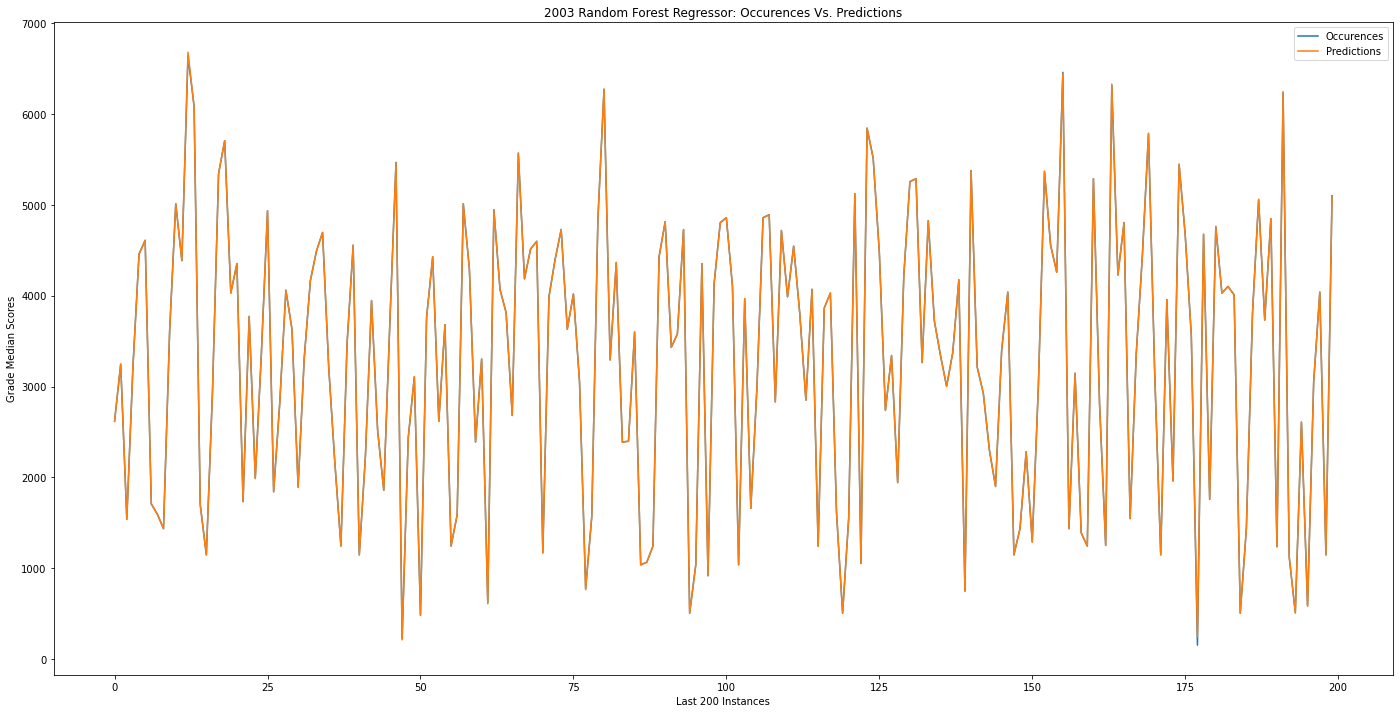

In [20]:
_ = plt.figure(figsize=(24, 12))
_ = x_ax = range(len(y_test03[-200:]))
_ = plt.plot(x_ax, y_test03[-200:], label="Occurences")
_ = plt.plot(x_ax, rf_y_pred03[-200:], label="Predictions")
_ = plt.title('2003 Random Forest Regressor: Occurences Vs. Predictions')
_ = plt.xlabel('Last 200 Instances')
_ = plt.ylabel('Grade Median Scores')
_ = plt.legend()
_ = plt.show()

## 2003: Gradient Boosting Regressor

In [9]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#incorporating the random forest estimator
pipeline = make_pipeline(GradientBoostingRegressor())

# OLD PARAMS
# grid search parameters
params = {'GradientBoostingRegressor__max_depth': range(5,17,2),
          'GradientBoostingRegressor__min_samples_split': range(200,1001,200)}
params2 = {'GradientBoostingRegressor__max_features':range(7,20,2)}
params3 = {'gradientboostingregressor__learning_rate': [.1, .3, .5, .7, .9],
          'gradientboostingregressor__n_estimators': [50, 80, 100, 120, 140, 180, 250],
          'gradientboostingregressor__subsample': [.6, .8, 1, 1.2, 1.4, 1.9],
          'gradientboostingregressor__min_samples_split': [1, 2, 3, 4, 6]}

cv_gb03 = RandomizedSearchCV(pipeline, params3, cv=3)

In [10]:
cv_rf03.fit(X_train03, y_train03)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                                                             70,
                                                                             80,
              

In [17]:
print(f'Best parameters: {cv_rf03.best_params_} \n\n\
Training accuracy score from tuned model: {cv_rf03.best_score_*100:.2f}%')

Best parameters: {'randomforestregressor__n_estimators': 1000, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 40, 'randomforestregressor__bootstrap': True} 

Training accuracy score from tuned model: 99.99%


## 2003: XGBoost Regressor

In [21]:
pipeline = make_pipeline(xgb.XGBRegressor())

# parameters
parameters = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
              'xgbregressor__objective':['reg:linear'],
              'xgbregressor__learning_rate': [.03, 0.05, .07], #so called `eta` value
              'xgbregressor__max_depth': [5, 6, 7],
              'xgbregressor__min_child_weight': [4],
              'xgbregressor__silent': [1],
              'xgbregressor__subsample': [0.7],
              'xgbregressor__colsample_bytree': [0.7],
              'xgbregressor__n_estimators': [500]}

In [22]:
cv_xgb03 = RandomizedSearchCV(pipeline, parameters, cv=3)

In [26]:
cv_xgb03.fit(X_train03, y_train03)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[22:39:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:39:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:39:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type='gain',
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_delta_step=None,
                                           

In [27]:
print(f'Best parameters: {cv_xgb03.best_params_} \n\n\
Training accuracy score from tuned model: {cv_xgb03.best_score_*100:.2f}%')

Best parameters: {'xgbregressor__subsample': 0.7, 'xgbregressor__silent': 1, 'xgbregressor__objective': 'reg:linear', 'xgbregressor__nthread': 4, 'xgbregressor__n_estimators': 500, 'xgbregressor__min_child_weight': 4, 'xgbregressor__max_depth': 6, 'xgbregressor__learning_rate': 0.07, 'xgbregressor__colsample_bytree': 0.7} 

Training accuracy score from tuned model: 99.92%


# 2003 No Derivatives

In [28]:
X_train03n, X_test03n, y_train03n, y_test03n = train_test_split(X2003_no_derivatives, y2003, test_size=.2,random_state=42)

In [29]:
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LinearSVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor()
]

for regression_model in regression_models:
    loop_pipe = make_pipeline(regression_model)
    loop_pipe.fit(X_train03n, y_train03n)   
    print(f'2003 No Derivatives\n\
    {regression_model} \n\
    model score: {loop_pipe.score(X_test03n, y_test03n):.4f}')

2003 No Derivatives
    LinearRegression() 
    model score: 0.1443
2003 No Derivatives
    Ridge() 
    model score: 0.1443


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8626648366.596571, tolerance: 2005302.4068366936
  model = cd_fast.enet_coordinate_descent(


2003 No Derivatives
    Lasso() 
    model score: 0.1447


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8736344098.568895, tolerance: 2005302.4068366936
  model = cd_fast.enet_coordinate_descent(


2003 No Derivatives
    ElasticNet() 
    model score: 0.1293


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


2003 No Derivatives
    LinearSVR() 
    model score: -1.5339
2003 No Derivatives
    RandomForestRegressor() 
    model score: 0.4237
2003 No Derivatives
    GradientBoostingRegressor() 
    model score: 0.3529
2003 No Derivatives
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
    model score: 0.4880


## 2003 No Derivatives: Random Forest Regressor

In [30]:
pipeline = make_pipeline(RandomForestRegressor())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}
print(random_grid)

cv_rf03n = RandomizedSearchCV(pipeline, random_grid, cv=3)

{'randomforestregressor__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4], 'randomforestregressor__bootstrap': [True, False]}


In [31]:
cv_rf03n.fit(X_train03n, y_train03n)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                                                             70,
                                                                             80,
              

In [32]:
print(f'Best parameters: {cv_rf03n.best_params_} \n\n\
Training accuracy score from tuned model: {cv_rf03n.best_score_*100:.2f}%')

Best parameters: {'randomforestregressor__n_estimators': 400, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 100, 'randomforestregressor__bootstrap': False} 

Training accuracy score from tuned model: 45.57%


## 2003 No Derivatives: Gradient Boosting Regressor

In [35]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#incorporating the random forest estimator
pipeline = make_pipeline(GradientBoostingRegressor())

# OLD PARAMS
# grid search parameters
params = {'GradientBoostingRegressor__max_depth': range(5,17,2),
          'GradientBoostingRegressor__min_samples_split': range(200,1001,200)}
params2 = {'GradientBoostingRegressor__max_features':range(7,20,2)}
params3 = {'gradientboostingregressor__learning_rate': [.1, .3, .5, .7, .9],
          'gradientboostingregressor__n_estimators': [50, 80, 100, 120, 140, 180, 250],
          'gradientboostingregressor__subsample': [.6, .8, 1, 1.2, 1.4, 1.9],
          'gradientboostingregressor__min_samples_split': [1, 2, 3, 4, 6]}

cv_gb03n = RandomizedSearchCV(pipeline, params3, cv=3)

In [36]:
cv_gb03n.fit(X_train03, y_train03)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 251, in _check_params
    raise ValueError("subsample must be in (0,1] but "
ValueError: subsample must be in (0,1] but was 1.4

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('gradientboostingregressor',
                                              GradientBoostingRegressor())]),
                   param_distributions={'gradientboostingregressor__learning_rate': [0.1,
                                                                                     0.3,
                                                                                     0.5,
                                                                                     0.7,
                                                                                     0.9],
                                        'gradientboostingregressor__min_samples_split': [1,
                                                                                         2,
                                                                                         3,
                                                                                         4,
   

In [37]:
print(f'Best parameters: {cv_gb03n.best_params_} \n\n\
Training accuracy score from tuned model: {cv_gb03n.best_score_*100:.2f}%')

Best parameters: {'gradientboostingregressor__subsample': 0.8, 'gradientboostingregressor__n_estimators': 250, 'gradientboostingregressor__min_samples_split': 2, 'gradientboostingregressor__learning_rate': 0.5} 

Training accuracy score from tuned model: 99.83%


## 2003 No Derivatives: XGBoost Regressor

In [38]:
pipeline = make_pipeline(xgb.XGBRegressor())

# parameters
parameters = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
              'xgbregressor__objective':['reg:linear'],
              'xgbregressor__learning_rate': [.03, 0.05, .07], #so called `eta` value
              'xgbregressor__max_depth': [5, 6, 7],
              'xgbregressor__min_child_weight': [4],
              'xgbregressor__silent': [1],
              'xgbregressor__subsample': [0.7],
              'xgbregressor__colsample_bytree': [0.7],
              'xgbregressor__n_estimators': [500]}

In [39]:
cv_xgb03n = RandomizedSearchCV(pipeline, parameters, cv=3)

In [40]:
cv_xgb03n.fit(X_train03n, y_train03n)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[07:30:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[07:30:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:30:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[07:30:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[07:30:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type='gain',
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_delta_step=None,
                                           

In [50]:
print(f'Best parameters: {cv_xgb03n.best_params_} \n\n\
Training accuracy score from tuned model: {cv_xgb03n.best_score_*100:.2f}%')

Best parameters: {'xgbregressor__subsample': 0.7, 'xgbregressor__silent': 1, 'xgbregressor__objective': 'reg:linear', 'xgbregressor__nthread': 4, 'xgbregressor__n_estimators': 500, 'xgbregressor__min_child_weight': 4, 'xgbregressor__max_depth': 7, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__colsample_bytree': 0.7} 

Training accuracy score from tuned model: 48.27%


# 2004

In [41]:
X_train04, X_test04, y_train04, y_test04 = train_test_split(X2004, y2004, test_size=.2,random_state=42)

In [42]:
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LinearSVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor()
]

for regression_model in regression_models:
    loop_pipe = make_pipeline(regression_model)
    loop_pipe.fit(X_train04, y_train04)   
    print(f'2004\n\
    {regression_model} \n\
    model score: {loop_pipe.score(X_test04, y_test04):.4f}')

2004
    LinearRegression() 
    model score: 0.9865
2004
    Ridge() 
    model score: 0.9865


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94138e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990384445.4974065, tolerance: 14185351.670222523
  model = cd_fast.enet_coordinate_descent(


2004
    Lasso() 
    model score: 0.9865


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999558659.9637808, tolerance: 14185351.670222523
  model = cd_fast.enet_coordinate_descent(


2004
    ElasticNet() 
    model score: 0.9864


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


2004
    LinearSVR() 
    model score: 0.7653
2004
    RandomForestRegressor() 
    model score: 1.0000
2004
    GradientBoostingRegressor() 
    model score: 0.9999
2004
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
    model score: 1.0000


## 2004: Random Forest Regressor

In [43]:
pipeline = make_pipeline(RandomForestRegressor())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}
print(random_grid)

cv_rf04 = RandomizedSearchCV(pipeline, random_grid, cv=3)

{'randomforestregressor__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4], 'randomforestregressor__bootstrap': [True, False]}


In [44]:
cv_rf04.fit(X_train04, y_train04)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                                                             70,
                                                                             80,
              

In [45]:
print(f'Best parameters: {cv_rf04.best_params_} \n\n\
Training accuracy score from tuned model: {cv_rf04.best_score_*100:.2f}%')

Best parameters: {'randomforestregressor__n_estimators': 1800, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': None, 'randomforestregressor__bootstrap': False} 

Training accuracy score from tuned model: 100.00%


## 2004: Gradient Boosting Regressor

In [51]:
pipeline = make_pipeline(GradientBoostingRegressor())

# grid search parameters
params3 = {'gradientboostingregressor__learning_rate': [.1, .3, .5, .7, .9],
          'gradientboostingregressor__n_estimators': [50, 80, 100, 120, 140, 180, 250],
          'gradientboostingregressor__subsample': [.6, .8, 1],
          'gradientboostingregressor__min_samples_split': [2, 3, 4, 6]}

cv_gb04 = RandomizedSearchCV(pipeline, params3, cv=3)

In [52]:
cv_gb04.fit(X_train04, y_train04)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('gradientboostingregressor',
                                              GradientBoostingRegressor())]),
                   param_distributions={'gradientboostingregressor__learning_rate': [0.1,
                                                                                     0.3,
                                                                                     0.5,
                                                                                     0.7,
                                                                                     0.9],
                                        'gradientboostingregressor__min_samples_split': [2,
                                                                                         3,
                                                                                         4,
                                                                                         6],
  

In [53]:
print(f'Best parameters: {cv_gb04.best_params_} \n\n\
Training accuracy score from tuned model: {cv_gb04.best_score_*100:.2f}%')

Best parameters: {'gradientboostingregressor__subsample': 0.6, 'gradientboostingregressor__n_estimators': 250, 'gradientboostingregressor__min_samples_split': 4, 'gradientboostingregressor__learning_rate': 0.3} 

Training accuracy score from tuned model: 100.00%


# 2004: XGBoost Regressor

In [54]:
pipeline = make_pipeline(xgb.XGBRegressor())

# parameters
parameters = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
              'xgbregressor__objective':['reg:linear'],
              'xgbregressor__learning_rate': [.03, 0.05, .07], #so called `eta` value
              'xgbregressor__max_depth': [5, 6, 7],
              'xgbregressor__min_child_weight': [4],
              'xgbregressor__silent': [1],
              'xgbregressor__subsample': [0.7],
              'xgbregressor__colsample_bytree': [0.7],
              'xgbregressor__n_estimators': [500]}

In [55]:
cv_xgb04 = RandomizedSearchCV(pipeline, parameters, cv=3)

In [56]:
cv_xgb04.fit(X_train04, y_train04)

[08:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[08:53:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:53:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type='gain',
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_delta_step=None,
                                           

In [58]:
print(f'Best parameters: {cv_xgb04.best_params_} \n\n\
Training accuracy score from tuned model: {cv_xgb04.best_score_*100:.2f}%')

Best parameters: {'xgbregressor__subsample': 0.7, 'xgbregressor__silent': 1, 'xgbregressor__objective': 'reg:linear', 'xgbregressor__nthread': 4, 'xgbregressor__n_estimators': 500, 'xgbregressor__min_child_weight': 4, 'xgbregressor__max_depth': 7, 'xgbregressor__learning_rate': 0.07, 'xgbregressor__colsample_bytree': 0.7} 

Training accuracy score from tuned model: 100.00%


# 2004 No Derivatives

In [59]:
X_train04n, X_test04n, y_train04n, y_test04n = train_test_split(X2004_no_derivatives, y2004, test_size=.2,random_state=42)

In [60]:
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    LinearSVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor()
]

for regression_model in regression_models:
    loop_pipe = make_pipeline(regression_model)
    loop_pipe.fit(X_train04n, y_train04n)   
    print(f'2004 No Derivatives\n\
    {regression_model} \n\
    model score: {loop_pipe.score(X_test04n, y_test04n):.4f}')

2004 No Derivatives
    LinearRegression() 
    model score: 0.1389
2004 No Derivatives
    Ridge() 
    model score: 0.1389


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94162e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60900351684.04027, tolerance: 14185351.670222523
  model = cd_fast.enet_coordinate_descent(


2004 No Derivatives
    Lasso() 
    model score: 0.1389


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63018243106.19742, tolerance: 14185351.670222523
  model = cd_fast.enet_coordinate_descent(


2004 No Derivatives
    ElasticNet() 
    model score: 0.1181


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


2004 No Derivatives
    LinearSVR() 
    model score: -3.9246
2004 No Derivatives
    RandomForestRegressor() 
    model score: 0.8606
2004 No Derivatives
    GradientBoostingRegressor() 
    model score: 0.4692
2004 No Derivatives
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
    model score: 0.8521


## 2004 No Derivatives: Random Forest Regressor

In [61]:
pipeline = make_pipeline(RandomForestRegressor())

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}
print(random_grid)

cv_rf04n = RandomizedSearchCV(pipeline, random_grid, cv=3)

{'randomforestregressor__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4], 'randomforestregressor__bootstrap': [True, False]}


In [62]:
cv_rf04n.fit(X_train04n, y_train04n)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                                                             70,
                                                                             80,
              

In [63]:
print(f'Best parameters: {cv_rf04n.best_params_} \n\n\
Training accuracy score from tuned model: {cv_rf04n.best_score_*100:.2f}%')

Best parameters: {'randomforestregressor__n_estimators': 1600, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 80, 'randomforestregressor__bootstrap': True} 

Training accuracy score from tuned model: 87.01%


## 2004 No Derivatives: Gradient Boosting Regressor

In [70]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#incorporating the random forest estimator
pipeline = make_pipeline(GradientBoostingRegressor())

# OLD PARAMS
# grid search parameters
params = {'GradientBoostingRegressor__max_depth': range(5,17,2),
          'GradientBoostingRegressor__min_samples_split': range(200,1001,200)}
params2 = {'GradientBoostingRegressor__max_features':range(7,20,2)}
params3 = {'gradientboostingregressor__learning_rate': [.1, .3, .5, .7, .9],
          'gradientboostingregressor__n_estimators': [50, 80, 100, 120, 140, 180, 250],
          'gradientboostingregressor__subsample': [.6, .8],
          'gradientboostingregressor__min_samples_split': [1, 2, 3, 4, 6]}

cv_gb04n = RandomizedSearchCV(pipeline, params3, cv=3)

In [71]:
cv_gb04n.fit(X_train04n, y_train04n)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  F

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('gradientboostingregressor',
                                              GradientBoostingRegressor())]),
                   param_distributions={'gradientboostingregressor__learning_rate': [0.1,
                                                                                     0.3,
                                                                                     0.5,
                                                                                     0.7,
                                                                                     0.9],
                                        'gradientboostingregressor__min_samples_split': [1,
                                                                                         2,
                                                                                         3,
                                                                                         4,
   

In [72]:
print(f'Best parameters: {cv_gb04n.best_params_} \n\n\
Training accuracy score from tuned model: {cv_gb04n.best_score_*100:.2f}%')

Best parameters: {'gradientboostingregressor__subsample': 0.8, 'gradientboostingregressor__n_estimators': 180, 'gradientboostingregressor__min_samples_split': 3, 'gradientboostingregressor__learning_rate': 0.9} 

Training accuracy score from tuned model: 83.27%


## 2004 No Derivatives: XGBoosting Regressor

In [73]:
pipeline = make_pipeline(xgb.XGBRegressor())

# grid search parameters
params = {'GradientBoostingRegressor__max_depth': range(5,17,2),
          'GradientBoostingRegressor__min_samples_split': range(200,1001,200)}
params2 = {'GradientBoostingRegressor__max_features':range(7,20,2)}
params3 = {'gradientboostingregressor__learning_rate': [.1, .3, .5, .7, .9],
          'gradientboostingregressor__n_estimators': [50, 80, 100, 120, 140, 180, 250],
          'gradientboostingregressor__subsample': [.6, .8, 1, 1.2, 1.4, 1.9],
          'gradientboostingregressor__min_samples_split': [1, 2, 3, 4, 6]}

cv_xgb04n = RandomizedSearchCV(pipeline, params3, cv=3)

In [74]:
cv_xgb04n = RandomizedSearchCV(pipeline, parameters, cv=3)

In [75]:
cv_xgb04n.fit(X_train04, y_train04)

[12:46:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[12:46:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:46:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type='gain',
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_delta_step=None,
                                           

In [76]:
print(f'Best parameters: {cv_xgb04n.best_params_} \n\n\
Training accuracy score from tuned model: {cv_xgb04n.best_score_*100:.2f}%')

Best parameters: {'xgbregressor__subsample': 0.7, 'xgbregressor__silent': 1, 'xgbregressor__objective': 'reg:linear', 'xgbregressor__nthread': 4, 'xgbregressor__n_estimators': 500, 'xgbregressor__min_child_weight': 4, 'xgbregressor__max_depth': 7, 'xgbregressor__learning_rate': 0.07, 'xgbregressor__colsample_bytree': 0.7} 

Training accuracy score from tuned model: 100.00%
